### Tracing test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

Start well with `tsandQ=[(0, -Q), (100, Q), (200, -Q)]`

In [2]:
Q = 100
npor = 0.3
k = 10
H = 10
T = k * H
Ss = 1e-4
S = Ss * H
ml = ModelMaq(kaq=[k], z=[H, 0], Saq=[Ss], tmin=0.01, tmax=1000, M=10)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, -Q), (100, Q), (200, -Q)], rw=0.3)
ml.solve()
trace = timtrace(ml, xstart=0.3, ystart=0, zstart=0, 
                 tstartend=[0, 100, 200, 400], tstartoffset=0.01, deltlist=10, 
                 nstepmax=120, hstepmax=2, correctionstep=True)
xyzt = trace['trace']

self.neq  1
solution complete
reached maximum time tmax
reached maximum time tmax
reached maximum time tmax


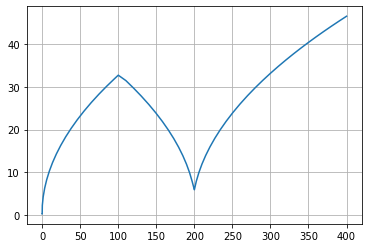

In [3]:
plt.plot(xyzt[:, 3], xyzt[:, 0])
plt.grid()

In [4]:
trace['status'], trace['message']

([1, 1, 1],
 ['reached maximum time tmax',
  'reached maximum time tmax',
  'reached maximum time tmax'])

#### Terminates at well

In [5]:
ml = ModelMaq(kaq=[k], z=[H, 0], Saq=[Ss], tmin=0.01, tmax=1000, M=10)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, -Q), (100, Q)], rw=0.3, label='testwell')
ml.solve()
trace = timtrace(ml, xstart=0.3, ystart=0, zstart=0, 
                 tstartend=[0, 100, 300], tstartoffset=0.01, deltlist=10, 
                 nstepmax=120, hstepmax=2, correctionstep=True)
xyzt = trace['trace']
print(trace['status'], trace['message'])
print(xyzt[-3:])

self.neq  1
solution complete
reached maximum time tmax
reached well element with label: testwell
[1, 2] ['reached maximum time tmax', 'reached well element with label: testwell']
[[  3.8943918    0.           0.         201.42194579]
 [  1.8943918    0.           0.         202.38286201]
 [  0.           0.           0.         203.05932345]]


#### Compare to numerical integration of velocity from Theis equation
\begin{equation}
Q_r = -T\frac{\partial h}{\partial r} = -T\frac{\text{d} h}{\text{d} u}\frac{\partial u}{\partial r} = -\frac{Q}{2\pi} \frac{1}{r}\exp(-u)
\end{equation}
\begin{equation}
u =  \frac{S r^2}{4T(t-t_0)}
\end{equation}

In [6]:
def vxytheis(t, xy):
    Q = -100
    npor = 0.3
    k = 10
    H = 10
    Ss = 1e-4
    T = k * H
    S = Ss * H
    x, y = xy
    r = np.sqrt(x ** 2 + y ** 2)
    u = S * r ** 2 / (4 * T * t)
    Qr = -Q / (2 * np.pi) / r * np.exp(-u)
    vr = Qr / (H * npor)
    vx = vr * x / r
    vy = vr * y / r
    return np.array([vx, vy])

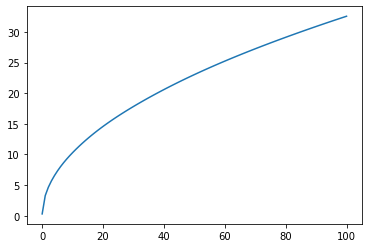

In [7]:
from scipy.integrate import solve_ivp
t = np.linspace(0.01, 100, 100)
path0 = solve_ivp(vxytheis, (0.01, 100), y0=[0.3, 0], t_eval=t)
plt.plot(path0.t, path0.y[0]);

#### Velocities in multi-layer system

In [8]:
Q = 100
npor = 0.3
k0 = 10
k1 = 40
H = 10
Hstar = 2
c = 100
T = k * H
Ss = 1e-4
S = Ss * H
ml = ModelMaq(kaq=[k0, k1], z=[2 * H + Hstar, H + Hstar, H, 0], c=[c], Saq=[Ss], tmin=0.01, tmax=10000, M=10)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, -Q)], layers=0, rw=0.3)
ml.solve()

self.neq  1
solution complete


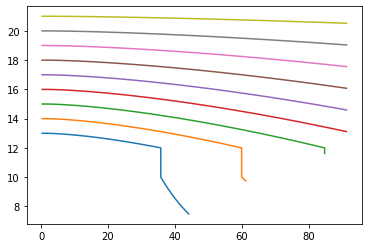

In [9]:
for z in np.arange(13, 22):
    trace = timtrace(ml, xstart=0.3, ystart=0, zstart=z, 
                     tstartend=[0, 1000], tstartoffset=0.01, deltlist=10, 
                     nstepmax=500, hstepmax=2, correctionstep=True, silent=True)
    xyzt = trace['trace']
    plt.plot(xyzt[:, 0], xyzt[:, 2])

#### Model3D

In [10]:
Q = 100
npor = 0.3
k = 10
H = 10
Hstar = 2
c = 1000
T = k * H
#Ss = 1e-4
Ss = 1e-8
S = Ss * H
ml = Model3D(kaq=10, z=[20, 15, 10, 5, 0], tmin=0.01, tmax=1000)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, -Q), (100, Q)], layers=1, rw=0.1)
ml.solve()

self.neq  1
solution complete


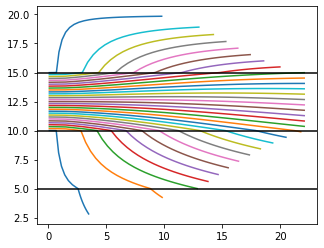

In [11]:
zstart = np.linspace(10.01, 14.99, 31)
for zs in zstart:
    trace = timtrace(ml, xstart=0.1, ystart=.1, zstart=zs, 
                     tstartend=[0, 100], tstartoffset=0.01, deltlist=5, 
                     nstepmax=40, hstepmax=2, silent=True)
    xyzt = trace['trace']
    plt.plot(xyzt[:, 0], xyzt[:, 2])
for y in [5, 10, 15]:
    plt.axhline(y, color='k')
plt.axis('scaled');

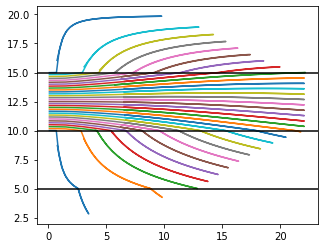

In [12]:
zstart = np.linspace(10.01, 14.99, 31)
for zs in zstart:
    trace = timtrace(ml, xstart=0.1, ystart=0.1, zstart=zs, 
                     tstartend=[0, 100, 200], tstartoffset=0.01, deltlist=5, 
                     nstepmax=40, hstepmax=2, silent=True, correctionstep=True)
    xyzt = trace['trace']
    plt.plot(xyzt[:, 0], xyzt[:, 2])
for y in [5, 10, 15]:
    plt.axhline(y, color='k')
plt.axis('scaled');